# **Unsupervised Learning Analysis**
## Importing Libaries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Load Data

In [13]:
bs_df=pd.read_csv("/content/drive/MyDrive/boat_data_cleaned.csv")
bs_df.head()

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR Price,Country,City,Pricing Category,Boat Class,Total_views
0,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt,Low-priced,Class A,203469
1,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern,Low-priced,Class A,203469
2,10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3570.0,Switzerland,Seengen,Low-priced,Class A,316879
3,12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda,Low-priced,Class A,116749
4,13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4692.0,Switzerland,Zugersee,Low-priced,Class A,316879


## Data Cleaning

In [45]:
df = bs_df[['Length','Width','Number of views last 7 days','EUR Price']]
df

,Length,Width,Number of views last 7 days,EUR Price
0,4.00,1.50,75,3490.00
1,3.55,1.46,58,3399.00
2,4.35,1.75,239,3570.00
3,4.70,2.00,69,3500.00
4,4.40,1.65,113,4692.00
...,...,...,...,...
5996,7.20,2.70,1299,5100.00
5997,6.00,2.10,1917,5098.98
5998,6.00,1.62,288,5049.00
5999,4.40,1.80,354,4499.00


## standardizing the data

In [20]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
print(standardized_data)
df = pd.DataFrame(standardized_data, columns=df.columns)
print(df)

[[-1.41005333 -1.76743232 -0.52645641 -0.36246306]
 [-1.50289423 -1.8047781  -0.62569917 -0.36260574]
 [-1.33784374 -1.53402117  0.43094436 -0.36233764]
 ...
 [-0.99742711 -1.65539497  0.71699703 -0.36001879]
 [-1.32752808 -1.48733894  1.10229246 -0.3608811 ]
 [-1.49257857 -1.67406786  0.16824293 -0.36188986]]
        Length     Width  Number of views last 7 days  EUR Price
0    -1.410053 -1.767432                    -0.526456  -0.362463
1    -1.502894 -1.804778                    -0.625699  -0.362606
2    -1.337844 -1.534021                     0.430944  -0.362338
3    -1.265634 -1.300610                    -0.561483  -0.362447
4    -1.327528 -1.627386                    -0.304620  -0.360579
...        ...       ...                          ...        ...
5996 -0.749851 -0.647059                     6.619022  -0.359939
5997 -0.997427 -1.207246                    10.226789  -0.359940
5998 -0.997427 -1.655395                     0.716997  -0.360019
5999 -1.327528 -1.487339              

In [29]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents
# a rate of variation for the given cluster option.

score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[-29668.28595234129,
 -20666.060369813313,
 -15005.99276019342,
 -9816.387415041863,
 -7104.925536989653,
 -6251.508886996848,
 -5509.444799198714,
 -4967.04895009019,
 -4360.906850389433]

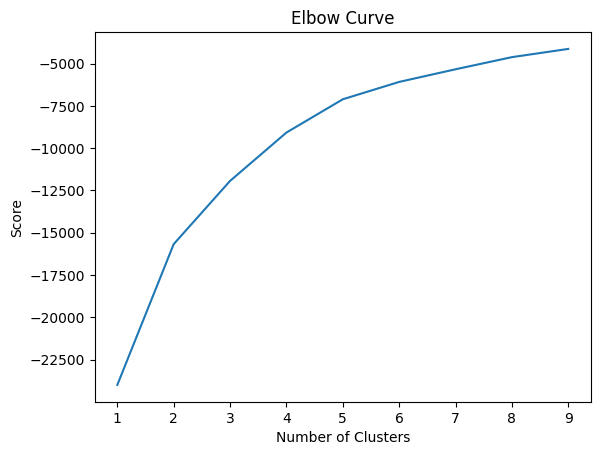

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##4. k-means clustering

In [48]:
# the k-means object.
kmeans = KMeans(n_clusters = 5)
# Fit the k-means object to the data.
kmeans.fit(df)
df['clusters'] = kmeans.fit_predict(df)
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-48-1d7a26d14747>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


,Length,Width,Number of views last 7 days,EUR Price,clusters
0,4.00,1.50,75,3490.0,0
1,3.55,1.46,58,3399.0,0
2,4.35,1.75,239,3570.0,0
3,4.70,2.00,69,3500.0,0
4,4.40,1.65,113,4692.0,0


In [49]:
df['clusters'].value_counts()

0    5311
4     578
2      89
1      22
3       1
Name: clusters, dtype: int64

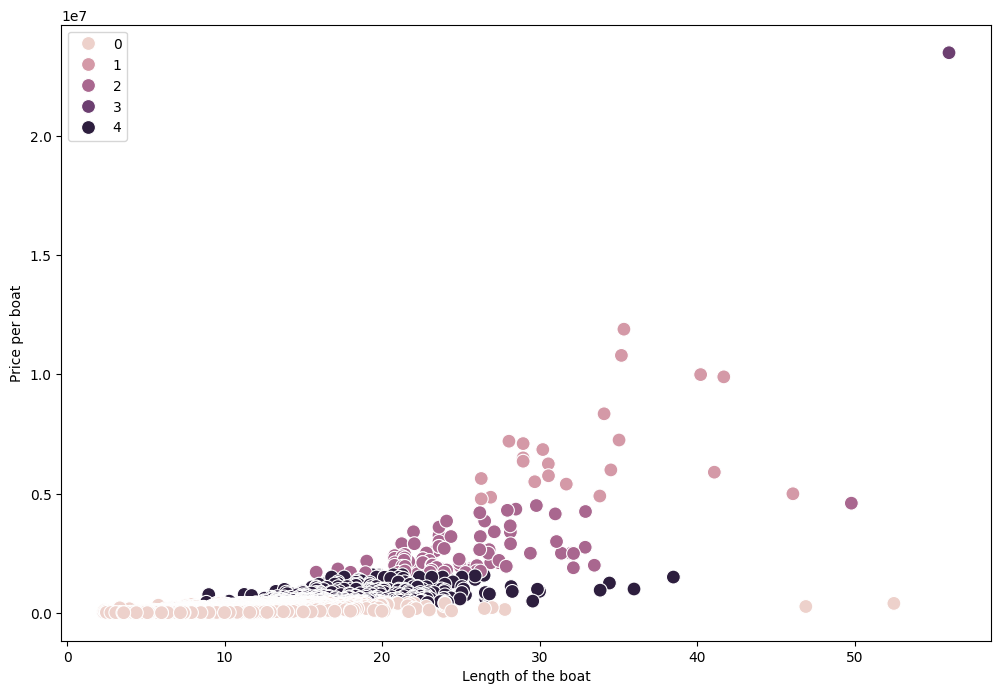

In [50]:
# Plot the clusters for the "EUR_price" and "Length" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Length'], y=df['EUR Price'], hue=kmeans.labels_, s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length of the boat') # Label x-axis.
plt.ylabel('Price per boat') # Label y-axis.
plt.show()

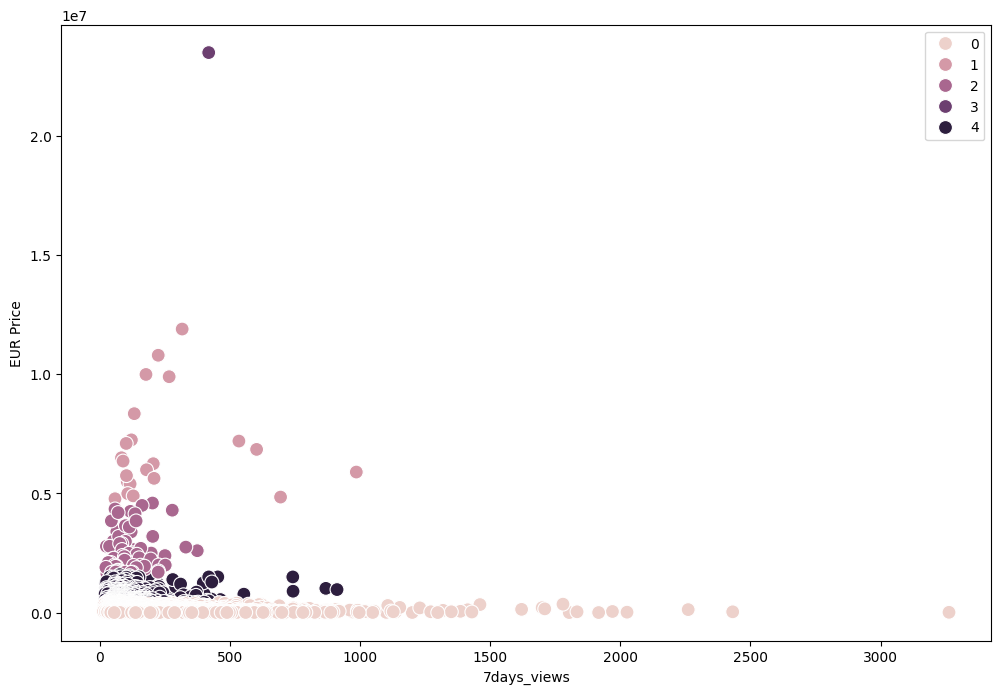

In [51]:
# Plot the clusters for the "7days_views" and "EUR_price" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Number of views last 7 days'], y=df['EUR Price'], hue=kmeans.labels_,s=100)
ax.grid(False)
plt.xlabel('7days_views')
plt.ylabel('EUR Price')
plt.show()

##Explaintion
The two charts lack coherence and fail to provide a comprehensive understanding of the correlation between boat cost and either the length or views of each boat. This implies that there are additional significant factors that collectively play a crucial role in determining the boat prices.

In [53]:
df.loc[df['clusters'] == 4, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 3, 'cluster'] = 'dent purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'whitish purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'whitish pink'
df.groupby('cluster').agg({'Length':['mean', 'median'],
                         'Width':['mean', 'median'],
                         'Number of views last 7 days':['mean', 'median'],
                          'EUR Price':['mean', 'median']})

Length              Width         \
                     mean  median       mean median   
cluster                                               
dark purple     17.996609  17.600   4.860623   4.85   
dent purple     56.000000  56.000  10.400000  10.40   
purple          24.862247  23.620   6.085281   5.97   
whitish pink     9.719991   9.150   3.170941   3.00   
whitish purple  32.925909  31.135   7.244091   7.09   

               Number of views last 7 days            EUR Price              
                                      mean median          mean      median  
cluster                                                                      
dark purple                     113.908304   85.0  7.355914e+05    629500.0  
dent purple                     419.000000  419.0  2.350000e+07  23500000.0  
purple                          112.404494   96.0  2.490888e+06   2250000.0  
whitish pink                    171.235549  120.0  1.102925e+05     74154.0  
whitish purple                  252.454545  155.5  6.916374e+06   6305000.0

 The cluster exhibiting a whitish-purple hue displays the most favorable statistics among all the groups. The mean values for lengths, widths, and prices within this cluster are the highest, significantly surpassing those of the other four groups. This can be attributed to the fact that the size of the boat, determined by its length and width, may be directly proportional to its price. In essence, there are additional crucial factors to consider when assessing boat prices. This analysis underscores the necessity of exploring other categorical variables in the data set to uncover the true determinants of value or views associated with each boat.